In [1]:
# --- 1. Standard Library Imports ---
import warnings

# --- 2. Core Data Science and Visualization Libraries ---
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# --- 3. Scikit-Learn (sklearn) Imports ---

# a. Preprocessing, Pipelines, and Model Selection
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# b. Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# c. Metrics
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
)

# --- 4. Other Machine Learning Libraries ---
from xgboost import XGBClassifier

warnings.filterwarnings('ignore')

# Load the Data

In [2]:
file_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
df_CustomerChurn = pd.read_csv(file_path)

# EDA and general data understanding

In [3]:
df_CustomerChurn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df_CustomerChurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Clean Data


# Create a dictionary to map old names to new names

In [5]:
new_column_names = {
    'customerID': 'customer_id',
    'gender': 'gender',
    'SeniorCitizen': 'is_senior_citizen',
    'Partner': 'partner',
    'Dependents': 'dependents',
    'tenure': 'tenure',
    'PhoneService': 'phone_service',
    'MultipleLines': 'multiple_lines',
    'InternetService': 'internet_service',
    'OnlineSecurity': 'online_security',
    'OnlineBackup': 'online_backup',
    'DeviceProtection': 'device_protection',
    'TechSupport': 'tech_support',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_movies',
    'Contract': 'contract',
    'PaperlessBilling': 'paperless_billing',
    'PaymentMethod': 'payment_method',
    'MonthlyCharges': 'monthly_charges',
    'TotalCharges': 'total_charges',
    'Churn': 'churn'
}

# Use the .rename() method to apply the changes
df_CustomerChurn = df_CustomerChurn.rename(columns=new_column_names)


print("Columns have been renamed successfully:")
print(df_CustomerChurn.columns)

Columns have been renamed successfully:
Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn'],
      dtype='object')


In [6]:
import re

# Function to convert CamelCase to snake_case
def to_snake_case(name):
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    return re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1).lower()

df_CustomerChurn.columns = [to_snake_case(col) for col in df_CustomerChurn.columns]

# The column 'customerID' becomes 'customer_i_d', so we fix it manually
df_CustomerChurn = df_CustomerChurn.rename(columns={'customer_i_d': 'customer_id'})

# Verify the changes
print("Columns have been renamed automatically:")
print(df_CustomerChurn.columns)

Columns have been renamed automatically:
Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn'],
      dtype='object')


# Calculate the number of unique values for each column in the DataFrame

In [7]:
unique_value_counts = df_CustomerChurn.nunique()

print("Number of unique values in each column:")
print(unique_value_counts)

Number of unique values in each column:
customer_id          7043
gender                  2
is_senior_citizen       2
partner                 2
dependents              2
tenure                 73
phone_service           2
multiple_lines          3
internet_service        3
online_security         3
online_backup           3
device_protection       3
tech_support            3
streaming_tv            3
streaming_movies        3
contract                3
paperless_billing       2
payment_method          4
monthly_charges      1585
total_charges        6531
churn                   2
dtype: int64


### In this first part, I performed a data cleaning step. My goal was to simplify the categorical features by merging values that have the same effective meaning. For instance, I replaced 'No internet service' with 'No' to reduce noise and help the model identify patterns more effectively.

In [8]:
# First, get the count of unique values for all columns
unique_counts = df_CustomerChurn.nunique()

# Filter to get only the columns that have 3 or 4 unique values
target_columns = unique_counts[(unique_counts >= 3) & (unique_counts <= 4)].index

print("--- Displaying Unique Values for Specific Categorical Columns ---\n")

# Loop through the filtered list of column names and print their unique values
for column in target_columns:
    print(f"Column '{column}':")
    print(df_CustomerChurn[column].unique())
    print("-" * 30)

--- Displaying Unique Values for Specific Categorical Columns ---

Column 'multiple_lines':
['No phone service' 'No' 'Yes']
------------------------------
Column 'internet_service':
['DSL' 'Fiber optic' 'No']
------------------------------
Column 'online_security':
['No' 'Yes' 'No internet service']
------------------------------
Column 'online_backup':
['Yes' 'No' 'No internet service']
------------------------------
Column 'device_protection':
['No' 'Yes' 'No internet service']
------------------------------
Column 'tech_support':
['No' 'Yes' 'No internet service']
------------------------------
Column 'streaming_tv':
['No' 'Yes' 'No internet service']
------------------------------
Column 'streaming_movies':
['No' 'Yes' 'No internet service']
------------------------------
Column 'contract':
['Month-to-month' 'One year' 'Two year']
------------------------------
Column 'payment_method':
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
------

### I noticed that six internet-related columns (like online_security) had a third value: 'No internet service'.

### I replaced this value with 'No', because they both effectively mean the customer does not have that specific feature. I did the same for 'No phone service' in the multiple_lines column.

### This step simplifies these features into a binary (Yes/No) format, which removes noise and improves data quality for the model.

In [9]:
# Create a list of columns that have the 'No internet service' category
cols_to_clean = [
    'online_security', 'online_backup', 'device_protection', 
    'tech_support', 'streaming_tv', 'streaming_movies'
]

# Loop through the list and replace 'No internet service' with 'No'
for column in cols_to_clean:
    df_CustomerChurn[column] = df_CustomerChurn[column].replace('No internet service', 'No')


# Also, clean the 'multiple_lines' column separately
df_CustomerChurn['multiple_lines'] = df_CustomerChurn['multiple_lines'].replace('No phone service', 'No')



print("--- Unique values in 'online_security' after cleaning ---")
print(df_CustomerChurn['online_security'].unique())

print("\n--- Unique values in 'multiple_lines' after cleaning ---")
print(df_CustomerChurn['multiple_lines'].unique())

--- Unique values in 'online_security' after cleaning ---
['No' 'Yes']

--- Unique values in 'multiple_lines' after cleaning ---
['No' 'Yes']


# Clean and Impute total_charges
### This code block corrects the total_charges column. It coerces any non-numeric strings to NaN, then imputes these missing values using the column's median.


In [10]:
df_CustomerChurn['total_charges'] = pd.to_numeric(df_CustomerChurn['total_charges'], errors='coerce')
median_total_charges = df_CustomerChurn['total_charges'].median()
df_CustomerChurn['total_charges'].fillna(median_total_charges, inplace=True)

# Dropping Unnecessary Columns
#### I am dropping the customer_id column. This column is a unique identifier for each customer and provides no predictive value for the model. It should be removed to reduce noise and prevent the model from learning irrelevant patterns.

In [11]:
df_CustomerChurn = df_CustomerChurn.drop(columns=['customer_id'])

# Create monthly_over_tenure Ratio Feature
### This code engineers the monthly_over_tenure ratio feature, which represents the monthly cost relative to the customer's tenure. Adding 1 to the tenure in the denominator is a defensive measure to prevent division-by-zero errors for new customers.

In [12]:
# We add 1 to tenure to avoid division by zero for new customers
df_CustomerChurn['monthly_over_tenure'] = df_CustomerChurn['monthly_charges'] / (df_CustomerChurn['tenure'] + 1)

print("Created 'monthly_over_tenure' feature.")


# --- Verification Step ---
# Check the DataFrame to see the new columns
print("\nDataFrame with new features (first 5 rows):")
display(df_CustomerChurn[['tenure', 'monthly_charges', 'monthly_over_tenure']].head())

Created 'monthly_over_tenure' feature.

DataFrame with new features (first 5 rows):


,tenure,monthly_charges,monthly_over_tenure
0,1,29.85,14.925000
1,34,56.95,1.627143
2,2,53.85,17.950000
3,45,42.30,0.919565
4,2,70.70,23.566667


# # --- Correlation Matrix Heatmap for Numerical Features Only ---

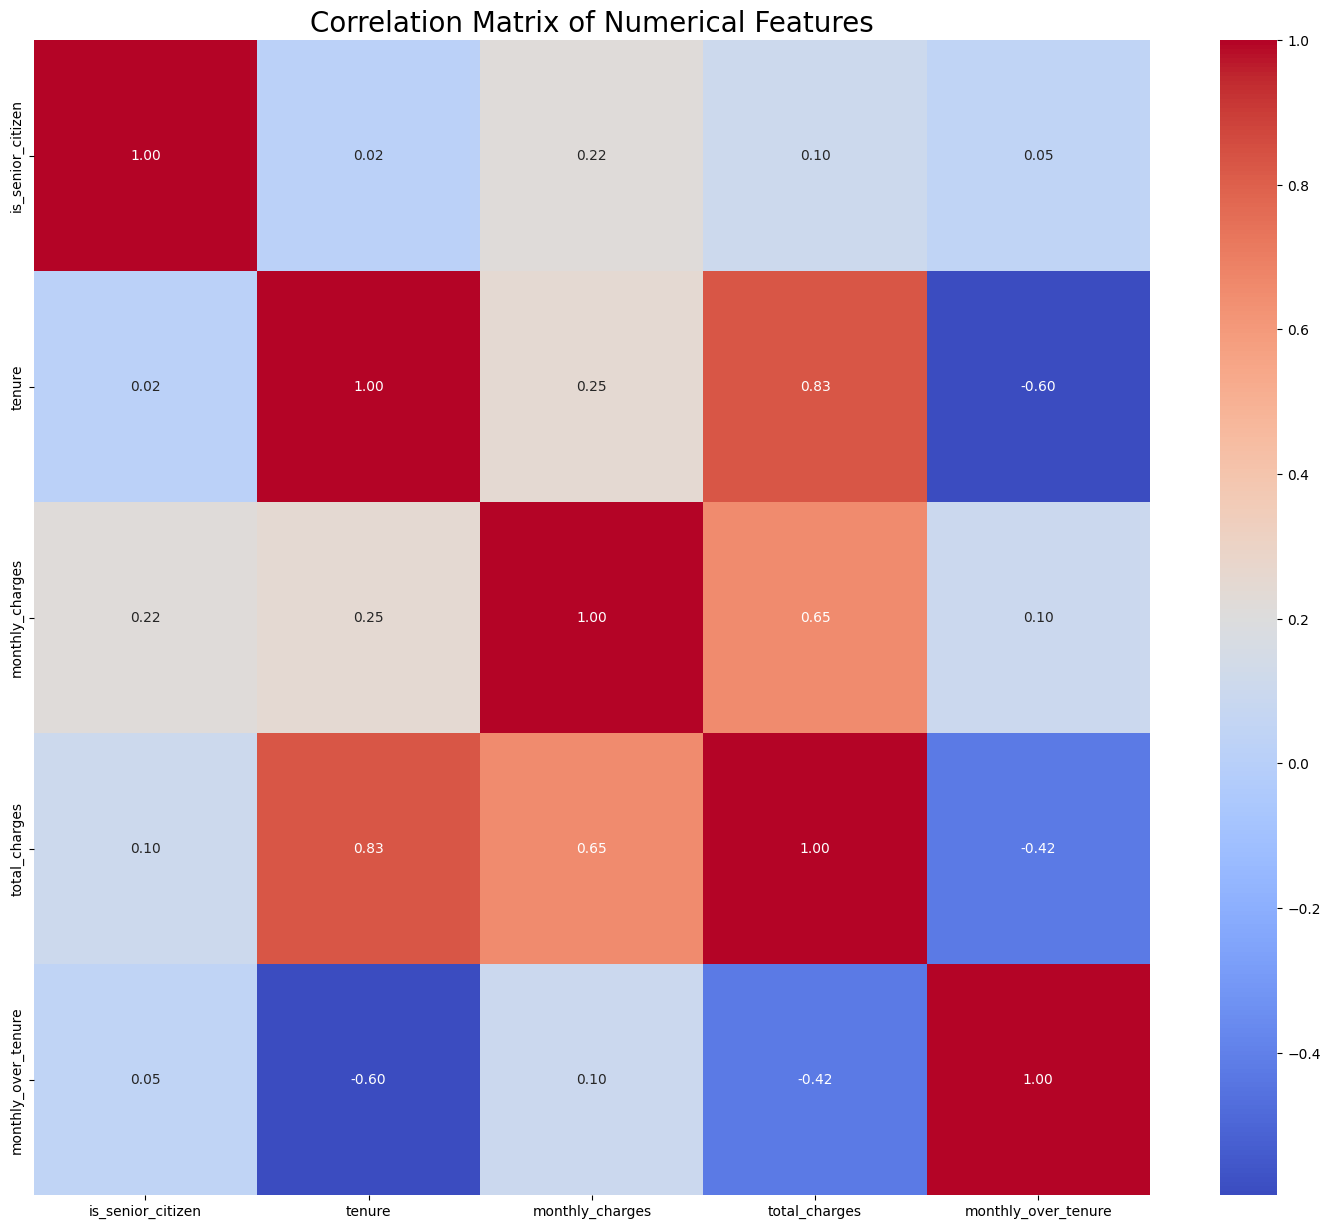

In [13]:
# First, select only the columns with numerical data types
numerical_df = df_CustomerChurn.select_dtypes(include=['int64', 'float64', 'bool'])

# Now, calculate the correlation matrix on the numerical subset
correlation_matrix = numerical_df.corr()

# Create the heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features', fontsize=20)
plt.show()

#  Initial Encoding for Binary and Ordinal Columns 

In [14]:


# Binary columns that are originally Yes/No or Male/Female
df_CustomerChurn['gender'] = df_CustomerChurn['gender'].map({'Female': 0, 'Male': 1})
df_CustomerChurn['partner'] = df_CustomerChurn['partner'].map({'No': 0, 'Yes': 1})
df_CustomerChurn['dependents'] = df_CustomerChurn['dependents'].map({'No': 0, 'Yes': 1})
df_CustomerChurn['phone_service'] = df_CustomerChurn['phone_service'].map({'No': 0, 'Yes': 1})
df_CustomerChurn['paperless_billing'] = df_CustomerChurn['paperless_billing'].map({'No': 0, 'Yes': 1})

# Columns that became binary after our cleaning
binary_cleaned_cols = ['multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']
for col in binary_cleaned_cols:
    df_CustomerChurn[col] = df_CustomerChurn[col].map({'No': 0, 'Yes': 1})

# Ordinal 'contract' column
contract_mapping = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
df_CustomerChurn['contract'] = df_CustomerChurn['contract'].map(contract_mapping)

# Final Encoding for Multi-Class Columns

In [15]:
df_CustomerChurn = pd.get_dummies(df_CustomerChurn, columns=['internet_service', 'payment_method'], drop_first=True)

print("Final encoding complete.")
display(df_CustomerChurn.head())

Final encoding complete.


,gender,is_senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,paperless_billing,monthly_charges,total_charges,churn,monthly_over_tenure,internet_service_Fiber optic,internet_service_No,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,29.85,29.85,No,14.925000,False,False,False,True,False
1,1,0,0,0,34,1,0,1,0,1,...,0,56.95,1889.50,No,1.627143,False,False,False,False,True
2,1,0,0,0,2,1,0,1,1,0,...,1,53.85,108.15,Yes,17.950000,False,False,False,False,True
3,1,0,0,0,45,0,0,1,0,1,...,0,42.30,1840.75,No,0.919565,False,False,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,1,70.70,151.65,Yes,23.566667,True,False,False,True,False


# 1. Target Variable Distribution
### The purpose is to understand if the dataset is balanced or imbalanced by showing the total number of customers who churned versus those who did not.

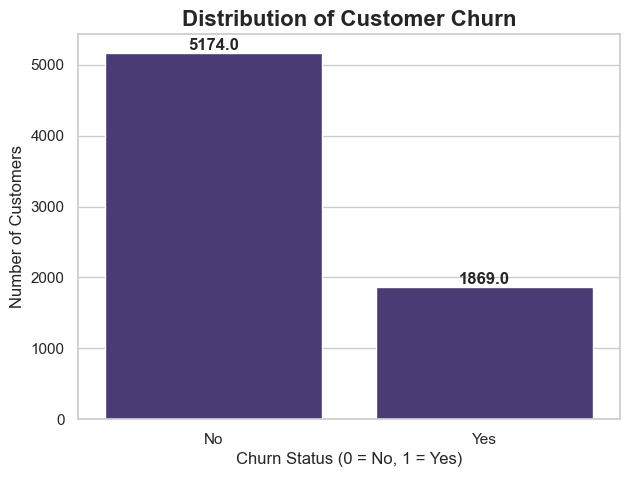

In [16]:
sns.set_theme(style="whitegrid", palette="viridis")

fig, ax = plt.subplots(figsize=(7, 5))

sns.countplot(x='churn', data=df_CustomerChurn, ax=ax)

ax.set_title('Distribution of Customer Churn', fontsize=16, fontweight='bold')
ax.set_xlabel('Churn Status (0 = No, 1 = Yes)', fontsize=12)
ax.set_ylabel('Number of Customers', fontsize=12)

# To make it even clearer, add the count on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontweight='bold')

plt.show()

# 2. Outlier Detection in Numerical Features
### Its main purpose is to show the data's spread (the range between the 25th and 75th percentiles) and to quickly identify any potential outliers


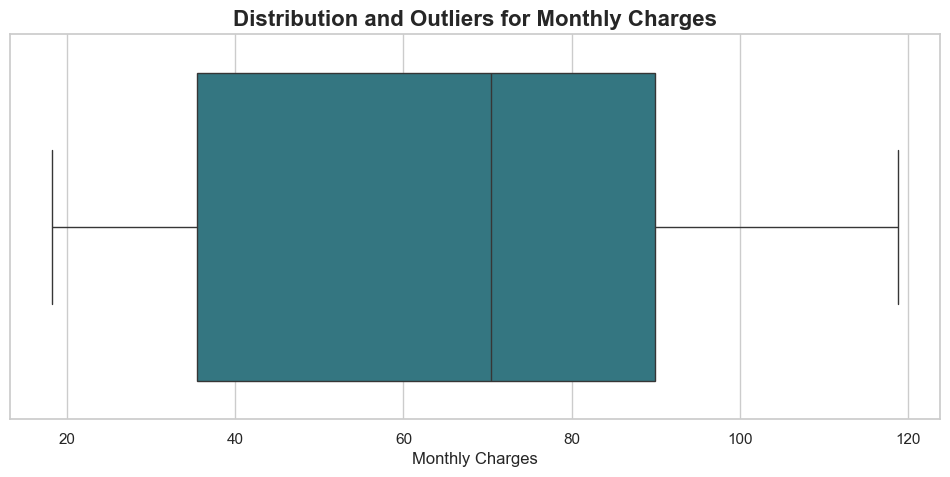

In [17]:
fig, ax = plt.subplots(figsize=(12, 5))

sns.boxplot(x=df_CustomerChurn['monthly_charges'], ax=ax, color=sns.color_palette("viridis")[2])

ax.set_title('Distribution and Outliers for Monthly Charges', fontsize=16, fontweight='bold')
ax.set_xlabel('Monthly Charges', fontsize=12)

plt.show()

# 3. Relationship between Categorical Features and Churn

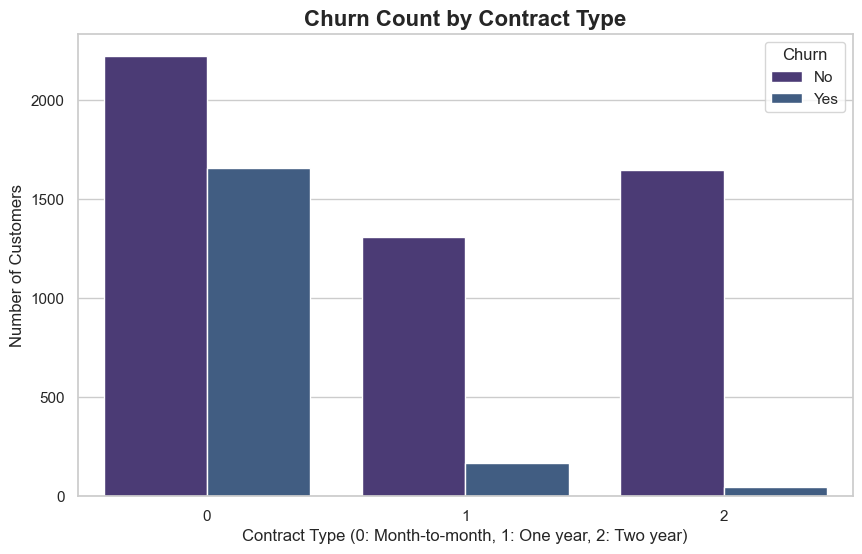

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(x='contract', hue='churn', data=df_CustomerChurn, ax=ax)

ax.set_title('Churn Count by Contract Type', fontsize=16, fontweight='bold')
ax.set_xlabel('Contract Type (0: Month-to-month, 1: One year, 2: Two year)', fontsize=12)
ax.set_ylabel('Number of Customers', fontsize=12)
ax.legend(title='Churn', labels=['No', 'Yes'])

plt.show()

# 4. Relationship between Numerical Features and Churn


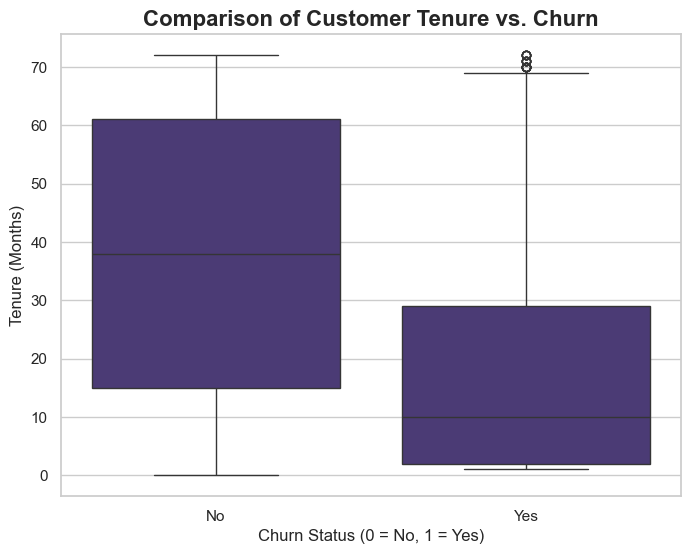

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(x='churn', y='tenure', data=df_CustomerChurn, ax=ax)

ax.set_title('Comparison of Customer Tenure vs. Churn', fontsize=16, fontweight='bold')
ax.set_xlabel('Churn Status (0 = No, 1 = Yes)', fontsize=12)
ax.set_ylabel('Tenure (Months)', fontsize=12)

plt.show()

#  (CRITICAL STEP) Ensure 'churn' is numeric BEFORE splitting

In [20]:

print(f"Data type of 'churn' before fixing: {df_CustomerChurn['churn'].dtype}")

df_CustomerChurn['churn'] = df_CustomerChurn['churn'].map({'No': 0, 'Yes': 1})

# Now, verify the change
print(f"Data type of 'churn' after fixing: {df_CustomerChurn['churn'].dtype}")
print(f"Unique values in 'churn' are now: {df_CustomerChurn['churn'].unique()}")

Data type of 'churn' before fixing: object
Data type of 'churn' after fixing: int64
Unique values in 'churn' are now: [0 1]


# Data Splitting and Scaling

In [21]:
# --- 1. Separate Features (X) and Target (y) ---

X = df_CustomerChurn.drop('churn', axis=1)
y = df_CustomerChurn['churn']

# We will use 80% of the data for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identify the numerical columns that need scaling
numerical_cols = ['tenure', 'monthly_charges']

scaler = StandardScaler()

# Fit the scaler ONLY on the training data and transform it
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# Use the SAME fitted scaler to transform the test data
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# --- 4. Verification Step ---
print("--- Scaled Training Data (First 5 Rows) ---")
display(X_train.head())

--- Scaled Training Data (First 5 Rows) ---


,gender,is_senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,contract,paperless_billing,monthly_charges,total_charges,monthly_over_tenure,internet_service_Fiber optic,internet_service_No,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
3738,1,0,0,0,0.102371,0,0,0,0,1,...,0,0,-0.521976,1701.65,1.366667,False,False,False,True,False
3151,1,0,1,1,-0.711743,1,0,1,0,0,...,0,0,0.337478,1151.55,4.693750,True,False,False,False,True
4860,1,0,1,1,-0.793155,0,0,1,1,0,...,2,0,-0.809013,590.35,2.896429,False,False,False,False,True
3867,0,0,1,0,-0.263980,1,0,0,1,1,...,2,1,0.284384,1905.70,2.722222,False,False,True,False,False
3810,1,0,1,1,-1.281624,1,0,0,0,0,...,0,0,-0.676279,44.55,22.275000,False,False,False,True,False


# Logistic Regression Model
### The most prominent and important result from this report is that the model successfully identified 78% of the customers who were actually going to leave the service (represented by the recall metric for class 1).

--- Logistic Regression Evaluation ---
Accuracy: 0.7452
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1035
           1       0.51      0.78      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.75      0.76      1409



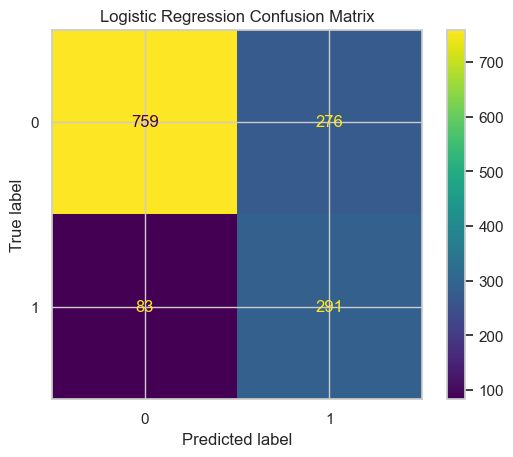

In [22]:
log_reg = LogisticRegression(class_weight='balanced',random_state=42) # class_weight='balanced' >>> This parameter prevents the model from becoming biased towards the majority class by giving more importance to the minority 'churn' class during training.
# Train the model
log_reg.fit(X_train, y_train)
# Make predictions on the test set
y_pred_lr = log_reg.predict(X_test)

# Evaluate Models

print("--- Logistic Regression Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(classification_report(y_test, y_pred_lr))
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test)
plt.title('Logistic Regression Confusion Matrix')
plt.show()

# XGBoost model
### The XGBoost model was trained and evaluated while applying the class balancing technique (scale_pos_weight) to handle data imbalance, but using the model's default hyperparameters (without tuning).
### The model successfully identified 68% of the customers who will actually leave (recall).

Calculated weight for XGBoost is: 2.77

Training the XGBoost model...
Training complete.

--- XGBoost Classifier Evaluation ---
Accuracy: 0.7622
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1035
           1       0.54      0.68      0.60       374

    accuracy                           0.76      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.76      0.77      1409

Displaying Confusion Matrix...


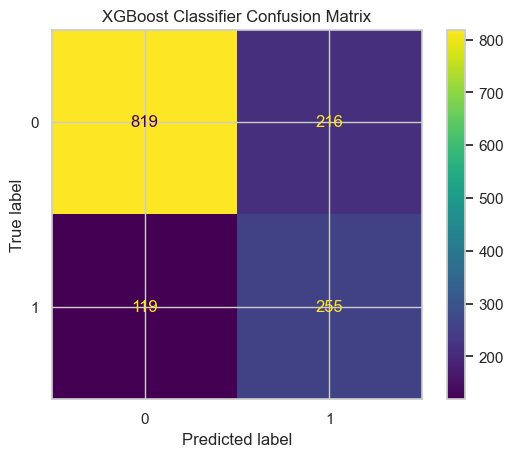

In [23]:
# --- Calculate the weight for handling class imbalance ---
count_no_churn = y_train.value_counts()[0]
count_yes_churn = y_train.value_counts()[1]
weight = count_no_churn / count_yes_churn
print(f"Calculated weight for XGBoost is: {weight:.2f}\n")

xgb_clf = XGBClassifier(
    scale_pos_weight=weight,  #<< # We include the 'scale_pos_weight' to activate balancing
    random_state=42, 
    use_label_encoder=False, 
    eval_metric='logloss'
)

# Train the model
print("Training the XGBoost model...")
xgb_clf.fit(X_train, y_train)
print("Training complete.")

# --- Make Predictions ---
y_pred_xgb = xgb_clf.predict(X_test)

# --- Classification Report ---
print("\n--- XGBoost Classifier Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(classification_report(y_test, y_pred_xgb))

# --- Confusion Matrix ---
print("Displaying Confusion Matrix...")
ConfusionMatrixDisplay.from_estimator(xgb_clf, X_test, y_test)
plt.title('XGBoost Classifier Confusion Matrix')
plt.show()

# Reusable Model Evaluation Function
### This code defines a helper function called evaluate_model to streamline and standardize our evaluation process. The purpose of this function is to avoid repeating the same code every time we want to test a new model.

In [24]:
def evaluate_model(model, X_test, y_test, model_name):
    """
    This function takes a trained model and evaluates its performance
    by printing a classification report and displaying a confusion matrix.
    """
    print(f"--- {model_name} Evaluation ---")
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Print accuracy and a detailed classification report
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred))
    
    # Display the confusion matrix
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

# Manual Hyperparameter Tuning for XGBoost
### This code block performs manual hyperparameter tuning by creating and evaluating three different versions of the XGBoost model. Each experiment tests a different combination of settings (max_depth, n_estimators, etc.) to find the most effective configuration for our specific data.

### Experiment 2 (using shallower trees but more of them) achieved the highest recall score, making it the most effective version at identifying customers who are likely to churn.

--- Starting Experiment 1: Deeper Trees ---
--- XGBoost - Experiment 1 (Deeper Trees) Evaluation ---
Accuracy: 0.7523
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1035
           1       0.52      0.76      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.80      0.75      0.76      1409



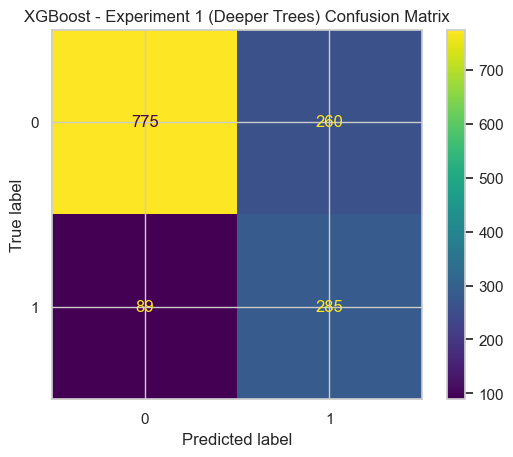



--- Starting Experiment 2: More Trees ---
--- XGBoost - Experiment 2 (More Trees) Evaluation ---
Accuracy: 0.7445
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1035
           1       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.76      1409



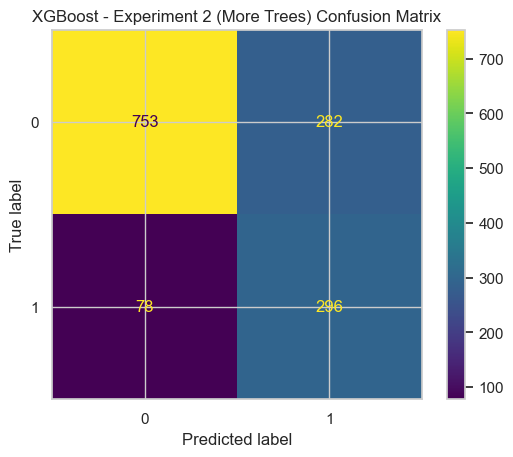



--- Starting Experiment 3: Slower Learning Rate ---
--- XGBoost - Experiment 3 (Slower Learning) Evaluation ---
Accuracy: 0.7459
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1035
           1       0.51      0.78      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.75      0.76      1409



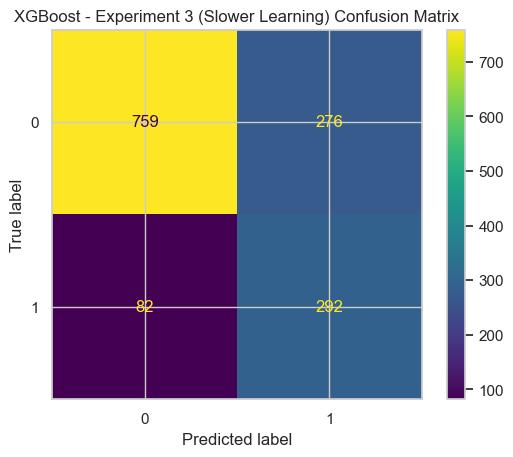

In [25]:
# --- Experiment 1: A model with deeper trees ---
print("--- Starting Experiment 1: Deeper Trees ---")
xgb_exp1 = XGBClassifier(
    scale_pos_weight=weight,
    max_depth=5,           # Trying a deeper tree
    n_estimators=150,      # With more trees
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
# Train and evaluate the first experiment
# (This assumes you have the 'evaluate_model' function we defined earlier)
xgb_exp1.fit(X_train, y_train)
evaluate_model(xgb_exp1, X_test, y_test, 'XGBoost - Experiment 1 (Deeper Trees)')


# --- Experiment 2: A model with shallower trees but more of them ---
print("\n\n--- Starting Experiment 2: More Trees ---")
xgb_exp2 = XGBClassifier(
    scale_pos_weight=weight,
    max_depth=3,           # Trying a shallower tree
    n_estimators=250,      # With even more trees
    learning_rate=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
# Train and evaluate the second experiment
xgb_exp2.fit(X_train, y_train)
evaluate_model(xgb_exp2, X_test, y_test, 'XGBoost - Experiment 2 (More Trees)')

# --- Experiment 3: A model with a slower learning rate ---
print("\n\n--- Starting Experiment 3: Slower Learning Rate ---")
xgb_exp3 = XGBClassifier(
    scale_pos_weight=weight,
    max_depth=4,           # A balanced depth between the first two experiments
    n_estimators=300,      # We need more trees because the learning rate is low
    learning_rate=0.05,    # Slower learning rate
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
# Train and evaluate the third experiment
xgb_exp3.fit(X_train, y_train)
evaluate_model(xgb_exp3, X_test, y_test, 'XGBoost - Experiment 3 (Slower Learning)')

# Final Model Comparison Using ROC-AUC Curve
## Logistic Regression (optimized)

### Recall: 0.78 (the highest)

### F1-score: 0.61 (the highest)

### AUC Score: 0.84 (the highest)

## XGBoost (manually fine-tuned):

### Recall: 0.79 (the highest by a very small margin in the best experiment)

### F1-score: 0.62 (the highest by a very small margin in the best experiment)

###  AUC Score: around 0.83-0.84 (very close)

AUC Score for Logistic Regression: 0.8437
AUC Score for Tuned XGBoost (Exp 2): 0.8386


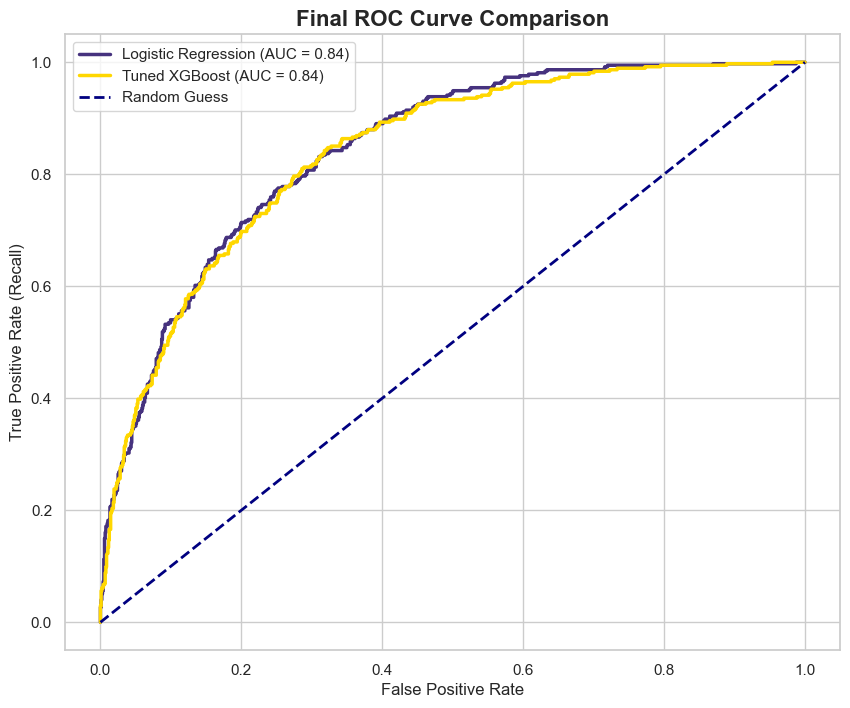

In [26]:
# We need the probabilities of the positive class (Churn=1)

# Probabilities from the Logistic Regression model
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]

# Probabilities from the best XGBoost experiment (Experiment 2)
# Ensure 'xgb_exp2' is your trained model from the manual tuning
y_prob_xgb_tuned = xgb_exp2.predict_proba(X_test)[:, 1] 

# --- Calculate AUC Scores ---
auc_lr = roc_auc_score(y_test, y_prob_lr)
auc_xgb_tuned = roc_auc_score(y_test, y_prob_xgb_tuned)

print(f"AUC Score for Logistic Regression: {auc_lr:.4f}")
print(f"AUC Score for Tuned XGBoost (Exp 2): {auc_xgb_tuned:.4f}")

# --- Calculate ROC Curve points ---
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_xgb_tuned, tpr_xgb_tuned, _ = roc_curve(y_test, y_prob_xgb_tuned)


# --- Plotting the ROC Curve for Final Comparison ---
plt.figure(figsize=(10, 8))

plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})', linewidth=2.5)

plt.plot(fpr_xgb_tuned, tpr_xgb_tuned, label=f'Tuned XGBoost (AUC = {auc_xgb_tuned:.2f})', linewidth=2.5 , color='gold')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')

plt.title('Final ROC Curve Comparison', fontsize=16, fontweight='bold')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.legend()
plt.show()

# visualizes the top 10 most important features using a bar chart.
### identify which features had the most impact on the model's predictions.
### The analysis reveals the key drivers of customer churn according to the model. The most critical factors are the customer's contract type and their tenure (how long they have been a customer).my engineered feature, monthly_over_tenure, also proved to be highly significant. This provides a clear, data-driven insight into why customers leave, which is essential for creating targeted retention strategies.

Extracting the best model from grid search...
Best model extracted successfully.

Calculating feature importances...


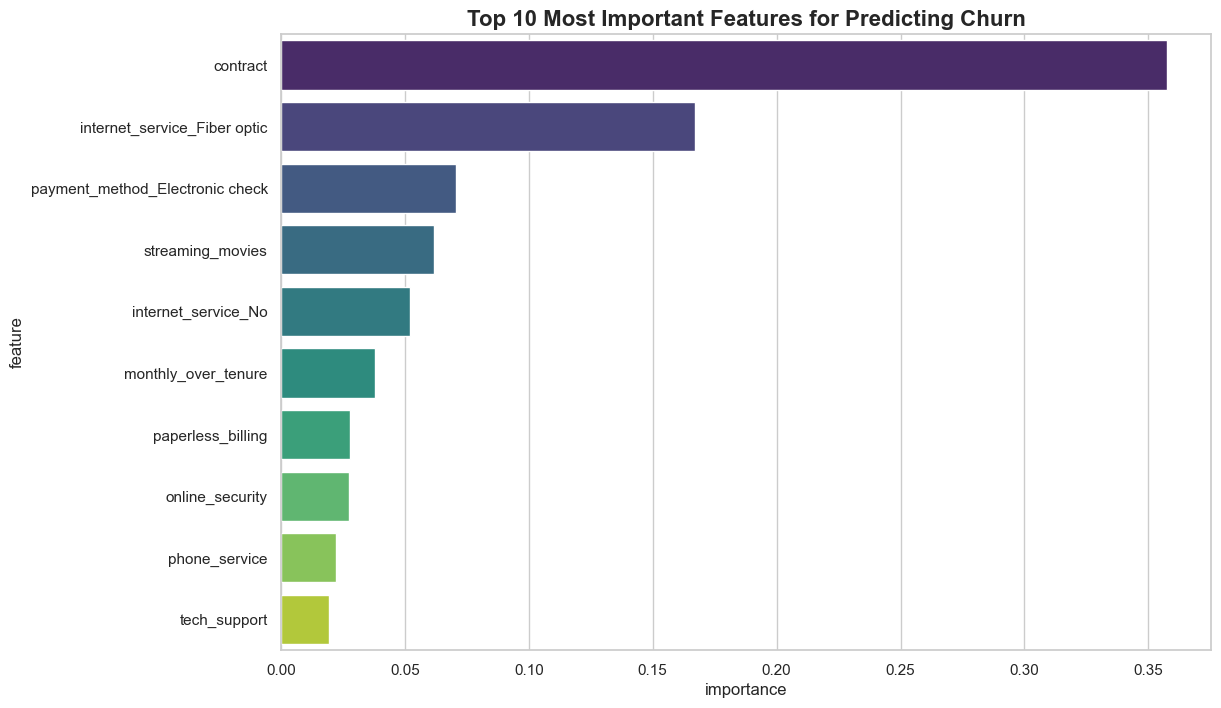

In [27]:
print("Extracting the best model from grid search...")
best_xgb_model = xgb_exp2
print("Best model extracted successfully.")

print("\nCalculating feature importances...")
importances = best_xgb_model.feature_importances_

# Get the names of the columns
feature_names = X_train.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# --- Plotting the Feature Importances ---
plt.figure(figsize=(12, 8))
sns.barplot(
    x='importance', 
    y='feature', 
    data=feature_importance_df.head(10),
    palette='viridis'
)
plt.title('Top 10 Most Important Features for Predicting Churn', fontsize=16, fontweight='bold')
plt.show()

# Insight 1: Identifying Critical Risk Customer Segments 

### This plot visualizes the distribution of churn probabilities for customers flagged as "at-risk". It clearly shows that risk is not uniform; we can identify a "Critical Risk Segment" (e.g., customers with a churn probability higher than 80%). This segmentation allows the company to direct its retention campaigns more intelligently and cost-effectively.

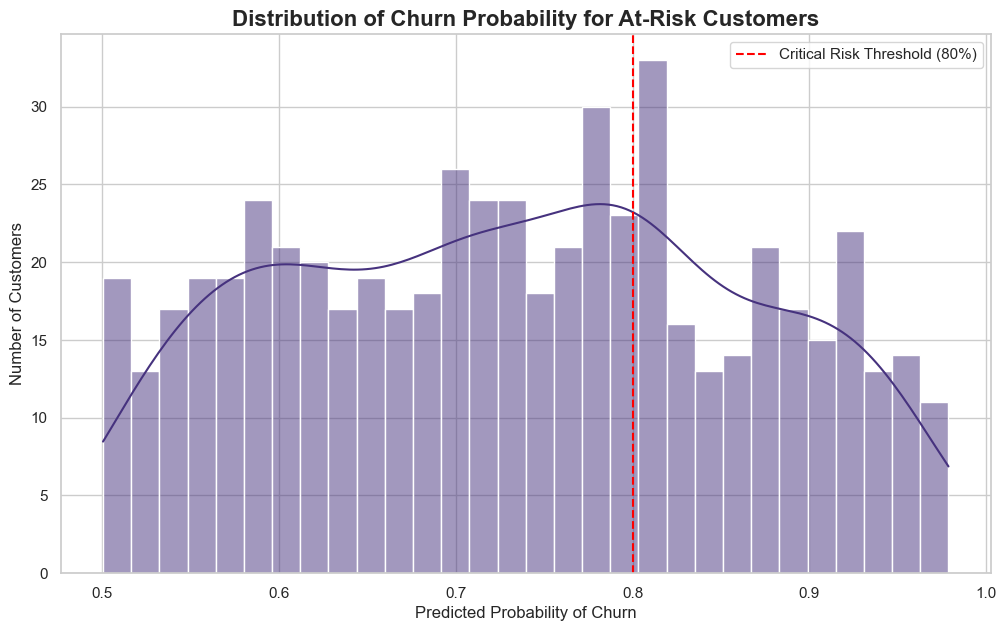

In [28]:
# --- Insight 1 Visualization: Distribution of Churn Probabilities ---

# This assumes 'best_xgb_model' and 'X_test' are ready
# Get the prediction probabilities for customers who are predicted to churn
churn_probabilities = best_xgb_model.predict_proba(X_test)[:, 1]
predicted_churn_mask = best_xgb_model.predict(X_test) == 1
at_risk_probabilities = churn_probabilities[predicted_churn_mask]

# --- Plotting the Distribution ---
plt.figure(figsize=(12, 7))
sns.histplot(at_risk_probabilities, kde=True, bins=30)

# Add vertical lines to define the risk segments
plt.axvline(x=0.80, color='red', linestyle='--', label='Critical Risk Threshold (80%)')

# --- Final Plot Settings ---
plt.title('Distribution of Churn Probability for At-Risk Customers', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Probability of Churn', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend()
plt.show()

# Insight 2: Turning Top Features into Actionable Business Insights

### These bar charts confirm that the most significant factors driving customers to leave are Contract Type and Tenure. We can clearly see that customers on Month-to-Month contracts and New customers (in their first year) have the highest churn rates. This provides the business with direct, actionable targets for policy improvements, such as creating incentives to upgrade contracts and enhancing the new customer onboarding experience.

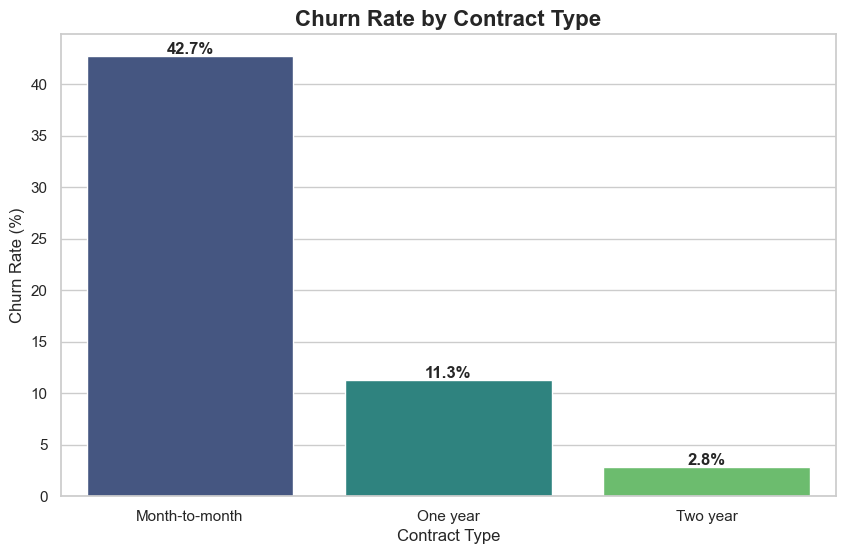

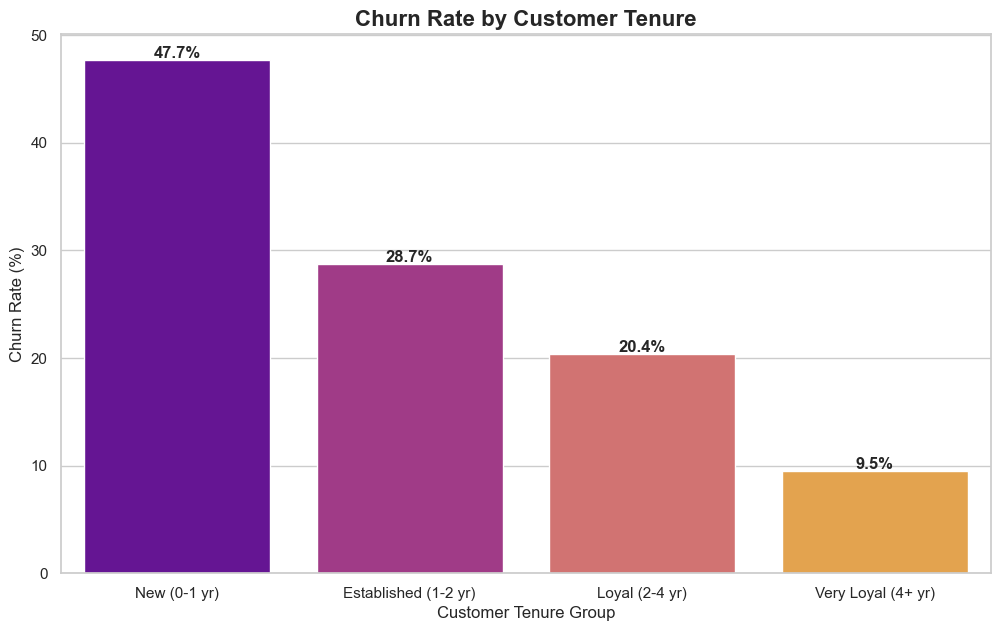

In [ ]:
# --- Plot for Contract Type 
fig, ax1 = plt.subplots(figsize=(10, 6))
churn_rate_by_contract = df_CustomerChurn.groupby('contract')['churn'].mean().sort_values(ascending=False) * 100

sns.barplot(x=churn_rate_by_contract.index, y=churn_rate_by_contract.values, ax=ax1, palette='viridis')
ax1.set_title('Churn Rate by Contract Type', fontsize=16, fontweight='bold')
ax1.set_xlabel('Contract Type', fontsize=12)
ax1.set_ylabel('Churn Rate (%)', fontsize=12)
# Set readable labels for x-axis
ax1.set_xticklabels(['Month-to-month', 'One year', 'Two year'])
# Add annotations
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontweight='bold')
plt.show()


# --- Plot for Tenure Bins ---
fig, ax2 = plt.subplots(figsize=(12, 7))
tenure_bins = pd.cut(df_CustomerChurn['tenure'], bins=[0, 12, 24, 48, 72], labels=['New (0-1 yr)', 'Established (1-2 yr)', 'Loyal (2-4 yr)', 'Very Loyal (4+ yr)'])
churn_rate_by_tenure = df_CustomerChurn.groupby(tenure_bins)['churn'].mean().sort_values(ascending=False) * 100

sns.barplot(x=churn_rate_by_tenure.index, y=churn_rate_by_tenure.values, ax=ax2, palette='plasma')
ax2.set_title('Churn Rate by Customer Tenure', fontsize=16, fontweight='bold')
ax2.set_xlabel('Customer Tenure Group', fontsize=12)
ax2.set_ylabel('Churn Rate (%)', fontsize=12)
# Add annotations
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontweight='bold')
plt.show()